<html>
<head>
    <style>
        h1, h2, h3 {
            text-align: center;
            line-height: 0.6;
        }
    </style>
</head>
<body>

<h1>AVALIAÇÃO DE DESEMPENHO DOS PLANOS DE SERVIÇOS:</h1>
<h2>Impacto na Receita e Implicações para Estratégias de Marketing</h2>

<p style="text-align: justify; margin-top: 40px; line-height: 1.6; font-size: 16px;">Este projeto visa analisar os dados dos serviços da empresa de telecomunicações Megaline (Chamadas (ligações), Mensagens (SMS) e Internet (dados)) a fim de demonstrar qual dos seus planos de assinatura, "Surf" e "Ultimate", gera mais receita e assim ajustar o orçamento de publicidade.</p>

</body>
</html>


### IMPORTAÇÃO DOS DADOS

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

### CARREGAMENTO DOS DADOS

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
plans_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_plans.csv')
users_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_users.csv')
calls_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_calls.csv')
messages_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_messages.csv')
internet_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_internet.csv')

### PREPARAÇÃO DOS DADOS

### Dados dos Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
print(plans_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [4]:
# Imprima uma amostra de dados dos planos
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Dados dos Usuários

In [5]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprima uma amostra de dados dos usuários
users_df.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<div class="alert alert-block alert-info">
<b>Observações:</b> <a class="tocSkip"></a>

- Observando os dados gerais do DataFrame podemos observar que há dados ausentes em uma das colunas, a 'churn_date' e na amostra vemos que esses dados são do tipo NaN demonstrando que alguns dos usuários cancelaram os planos. Criaremos uma nova coluna booleana para filtrar essas linhas para fins de análise se necessário.
    
- Converteremos as colunas com datas para o tipo 'datetime' e as colunas com valores em maiúsculas para lower case também.
    
- Criaremos uma coluna apenas com os meses extraindo das colunas com datas.

</div>

### Correção dos dados

In [7]:
# Convertendo os dados para lower case
users_df['first_name'] = users_df['first_name'].str.lower()
users_df['last_name'] = users_df['last_name'].str.lower()
users_df['city'] = users_df['city'].str.lower()

# Convertendo colunas para 'datetime'
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

#renomeando a coluna 'plan' para 'plan_name'
users_df = users_df.rename(columns={'plan': 'plan_name'})

users_df.info()
users_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
129,1129,marin,bolton,70,"baton rouge, la msa",2018-11-10,surf,2018-12-27
388,1388,thu,noel,75,"new york-newark-jersey city, ny-nj-pa msa",2018-03-28,ultimate,NaT
218,1218,stanford,pena,23,"bakersfield, ca msa",2018-01-16,surf,NaT
426,1426,lamont,conner,44,"san francisco-oakland-berkeley, ca msa",2018-07-09,ultimate,NaT
287,1287,heide,gill,74,"sacramento–roseville–folsom, ca msa",2018-03-15,surf,NaT


### Enriquecimento dos dados (Criação de novas colunas)

In [8]:
# Preenchendo uma nova coluna booleana de churn (flag)
def preencher_churn_new(row):
  if pd.isnull(row['churn_date']):
    return 0
  else:
    return 1

users_df['churn_bool'] = users_df.apply(preencher_churn_new, axis=1)

# Criando coluna de meses
users_df['reg_mes'] = users_df['reg_date'].dt.month
users_df['churn_mes'] = users_df['churn_date'].dt.month

# Criando coluna state a partir da coluna city
users_df[['city', 'state']] = users_df['city'].str.split(',', expand=True)

users_df.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,churn_bool,reg_mes,churn_mes,state
14,1014,edmundo,simon,61,new york-newark-jersey city,2018-11-25,surf,NaT,0,11,NaN,ny-nj-pa msa
229,1229,augustus,barker,69,austin-round rock-georgetown,2018-12-09,ultimate,NaT,0,12,NaN,tx msa
117,1117,hank,taylor,49,dallas-fort worth-arlington,2018-01-24,surf,NaT,0,1,NaN,tx msa
343,1343,teresia,ewing,43,miami-fort lauderdale-west palm beach,2018-08-23,surf,NaT,0,8,NaN,fl msa
498,1498,scot,williamson,51,new york-newark-jersey city,2018-02-04,surf,NaT,0,2,NaN,ny-nj-pa msa


### Dados das Chamadas

In [9]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprima uma amostra de dados das chamadas
calls_df.sample(5)

,id,user_id,call_date,duration
74518,1263_502,1263,2018-08-08,10.28
777,1004_283,1004,2018-09-03,11.82
112987,1397_711,1397,2018-12-05,7.06
61819,1222_466,1222,2018-12-20,5.66
6568,1031_243,1031,2018-10-11,4.46


### Correção dos dados

In [11]:
# Convertendo coluna para datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

### Enriquecimento dos dados (Criação de coluna)

In [12]:
# Criando coluna mês
calls_df['mes'] = calls_df['call_date'].dt.month

calls_df.info()
calls_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   mes        137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 4.7+ MB


,id,user_id,call_date,duration,mes
59116,1214_185,1214,2018-04-23,17.47,4
92925,1334_293,1334,2018-05-16,3.73,5
21587,1079_300,1079,2018-12-27,2.26,12
68907,1247_240,1247,2018-07-28,13.65,7
81493,1293_627,1293,2018-10-03,5.27,10


### Dados das Mensagens

In [13]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprima uma amostra dos dados das mensagens
messages_df.sample(5)

,id,user_id,message_date
29680,1183_75,1183,2018-10-29
24858,1147_29,1147,2018-05-14
52253,1336_210,1336,2018-05-11
25535,1154_118,1154,2018-12-11
71676,1467_8,1467,2018-06-11


### Correção dos dados

In [15]:
# Convertento coluna para datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

### Enriquecimento dos dados

In [16]:
# Criando coluna mês
messages_df['mes'] = messages_df['message_date'].dt.month

messages_df.info()
messages_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   mes           76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


,id,user_id,message_date,mes
69143,1448_281,1448,2018-12-03,12
73623,1472_208,1472,2018-05-30,5
30525,1193_78,1193,2018-10-17,10
74916,1487_57,1487,2018-12-24,12
9406,1069_372,1069,2018-11-23,11


### Dados de Internet

In [17]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
#  Imprima uma amostra de dados para o tráfego da internet
internet_df.sample(5)

,id,user_id,session_date,mb_used
63222,1291_347,1291,2018-09-12,266.84
84171,1392_139,1392,2018-10-28,197.75
77818,1362_508,1362,2018-11-04,0.00
68917,1321_382,1321,2018-06-28,139.75
83744,1390_299,1390,2018-06-26,849.08


### Correção dos dados

In [19]:
# Convertendo coluna para 'datetime'
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')

### Enriquecimento dos dados

In [20]:
# Criando coluna mês
internet_df['mes'] = internet_df['session_date'].dt.month

# Criando coluna gb_used
internet_df['gb_used'] = (internet_df['mb_used'] / 1024).round(2)

# Criando coluna gb_per_month_included
plans_df['gb_per_month_included'] = (plans_df['mb_per_month_included'] / 1024).round(2)

print(internet_df.head())
plans_df.head()


         id  user_id session_date  mb_used  mes  gb_used
0   1000_13     1000   2018-12-29    89.86   12     0.09
1  1000_204     1000   2018-12-31     0.00   12     0.00
2  1000_379     1000   2018-12-28   660.40   12     0.64
3  1000_413     1000   2018-12-26   270.99   12     0.26
4  1000_442     1000   2018-12-27   880.22   12     0.86


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


### AGRUPAMENTO DE DADOS

In [21]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
chamadas_por_mes = calls_df.groupby(['user_id', 'mes', 'id']).size().reset_index(name='chamadas')
chamadas_por_mes.sample(5)

,user_id,mes,id,chamadas
24459,1094,11,1094_101,1
136971,1496,11,1496_58,1
6394,1030,12,1030_157,1
110608,1390,5,1390_125,1
98143,1352,11,1352_45,1


In [22]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
minutos_por_mes = calls_df.groupby(['user_id', 'mes', 'id'])['duration'].sum().reset_index(name='minutos')
minutos_por_mes.sample(5)

,user_id,mes,id,minutos
54287,1196,3,1196_395,0.00
24108,1090,10,1090_405,8.88
22021,1081,11,1081_14,17.17
47658,1172,11,1172_201,0.00
107714,1382,8,1382_1278,0.00


In [23]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
mensagens_por_mes = messages_df.groupby(['user_id', 'mes', 'id']).size().reset_index(name='mensagens')
mensagens_por_mes.sample(5)

,user_id,mes,id,mensagens
41835,1268,9,1268_275,1
44281,1294,10,1294_157,1
39175,1255,9,1255_545,1
8225,1061,8,1061_371,1
44849,1301,12,1301_46,1


In [24]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
trafego_vol = internet_df.groupby(['user_id', 'mes', 'id'])['gb_used'].sum().reset_index(name='volume_gb')
trafego_vol.sample(5)

,user_id,mes,id,volume_gb
1967,1010,5,1010_238,0.12
67590,1313,11,1313_223,0.44
31420,1144,6,1144_460,0.19
24197,1110,12,1110_237,0.12
8283,1043,11,1043_405,0.61


### Mesclagem de DataFrames

In [25]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
calls_agg = chamadas_por_mes.groupby(['user_id', 'mes'])['chamadas'].count().reset_index()
minutes_agg = minutos_por_mes.groupby(['user_id', 'mes'])['minutos'].sum().reset_index()
messages_agg = mensagens_por_mes.groupby(['user_id', 'mes'])['mensagens'].count().reset_index()
internet_agg = trafego_vol.groupby(['user_id', 'mes'])['volume_gb'].sum().reset_index()

# Mesclando DataFrames
user_agreg = calls_agg.merge(minutes_agg, on=['user_id', 'mes'], how='outer')
user_agreg = user_agreg.merge(messages_agg, on=['user_id', 'mes'], how='outer')
user_agreg = user_agreg.merge(internet_agg, on=['user_id', 'mes'], how='outer')
user_agreg = user_agreg.merge(users_df[['user_id', 'plan_name', 'city', 'state']], on='user_id', how='left')

print(user_agreg.shape[0])
user_agreg.sample(5)

2293


,user_id,mes,chamadas,minutos,mensagens,volume_gb,plan_name,city,state
1827,1400,8,65.0,500.47,NaN,10.75,surf,riverside-san bernardino-ontario,ca msa
823,1175,11,89.0,680.41,30.0,16.80,surf,new york-newark-jersey city,ny-nj-pa msa
326,1071,6,61.0,335.94,NaN,12.37,surf,new york-newark-jersey city,ny-nj-pa msa
295,1065,10,87.0,687.97,29.0,16.64,surf,los angeles-long beach-anaheim,ca msa
1950,1425,10,35.0,245.99,11.0,17.82,surf,las vegas-henderson-paradise,nv msa


### Tratamento de valores nulos

In [26]:
# ANALISANDO VALORES NULOS
valores_nulos_por_coluna = user_agreg.isnull().sum()
print(valores_nulos_por_coluna)

# Substituindo NaN por zero na coluna 'mensagens', 'chamadas', 'minutos' e 'volume_gb'
user_agreg['mensagens'] = user_agreg['mensagens'].fillna(0)
user_agreg['chamadas'] = user_agreg['chamadas'].fillna(0)
user_agreg['minutos'] = user_agreg['minutos'].fillna(0)
user_agreg['volume_gb'] = user_agreg['volume_gb'].fillna(0)

user_agreg.head(5)

user_id        0
mes            0
chamadas      35
minutos       35
mensagens    487
volume_gb     16
plan_name      0
city           0
state          0
dtype: int64


,user_id,mes,chamadas,minutos,mensagens,volume_gb,plan_name,city,state
0,1000,12,16.0,116.83,11.0,1.85,ultimate,atlanta-sandy springs-roswell,ga msa
1,1001,8,27.0,171.14,30.0,6.76,surf,seattle-tacoma-bellevue,wa msa
2,1001,9,49.0,297.69,44.0,12.99,surf,seattle-tacoma-bellevue,wa msa
3,1001,10,65.0,374.11,53.0,21.77,surf,seattle-tacoma-bellevue,wa msa
4,1001,11,64.0,404.59,36.0,18.08,surf,seattle-tacoma-bellevue,wa msa


In [27]:
# Adicione as informações sobre o plano
df_completo = user_agreg.merge(plans_df[['plan_name', 'usd_monthly_pay', 'messages_included', 'gb_per_month_included', 'minutes_included', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']], on='plan_name')

df_completo.sample(5)

,user_id,mes,chamadas,minutos,mensagens,volume_gb,plan_name,city,state,usd_monthly_pay,messages_included,gb_per_month_included,minutes_included,usd_per_gb,usd_per_message,usd_per_minute
1634,1291,12,88.0,593.50,17.0,11.90,surf,indianapolis-carmel-anderson,in msa,20,50,15.0,500,10,0.03,0.03
2084,1425,9,11.0,77.91,5.0,8.04,surf,las vegas-henderson-paradise,nv msa,20,50,15.0,500,10,0.03,0.03
1183,1146,10,39.0,206.48,43.0,11.38,surf,new york-newark-jersey city,ny-nj-pa msa,20,50,15.0,500,10,0.03,0.03
2018,1400,12,81.0,496.13,0.0,21.39,surf,riverside-san bernardino-ontario,ca msa,20,50,15.0,500,10,0.03,0.03
1575,1268,10,72.0,431.44,33.0,33.55,surf,fresno,ca msa,20,50,15.0,500,10,0.03,0.03


### CÁLCULOS DOS DADOS PARA ANÁLISE:
### Minutos, mensagens e dados de internet excedentes, receita mensal.

In [28]:
# Calculos
minutos_excedentes = df_completo['minutos'] - df_completo['minutes_included']
custo_minutos_excedentes = minutos_excedentes * df_completo['usd_per_minute']

mensagens_excedentes = df_completo['mensagens'] - df_completo['messages_included']
custo_mensagens_excedentes = mensagens_excedentes * df_completo['usd_per_message']

dados_excedentes = (df_completo['volume_gb'] - df_completo['gb_per_month_included'])
custo_dados_excedentes = dados_excedentes * df_completo['usd_per_gb']

# Limitando a 0 qualquer resultado negativo
minutos_excedentes = minutos_excedentes.clip(lower=0)
custo_minutos_excedentes = custo_minutos_excedentes.clip(lower=0)

mensagens_excedentes = mensagens_excedentes.clip(lower=0)
custo_mensagens_excedentes = custo_mensagens_excedentes.clip(lower=0)

dados_excedentes = dados_excedentes.clip(lower=0)
custo_dados_excedentes = custo_dados_excedentes.clip(lower=0)

# Colunas excedentes e custos excedentes
df_completo['minutos_excedentes'] = minutos_excedentes
df_completo['custo_minutos_excedentes'] = custo_minutos_excedentes
df_completo['mensagens_excedentes'] = mensagens_excedentes
df_completo['custo_mensagens_excedentes'] = custo_mensagens_excedentes
df_completo['dados_excedentes'] = dados_excedentes
df_completo['custo_dados_excedentes'] = custo_dados_excedentes

# Receita mensal
df_completo['receita_mensal'] = df_completo['usd_monthly_pay'] + df_completo['custo_minutos_excedentes'] + df_completo['custo_mensagens_excedentes'] + df_completo['custo_dados_excedentes']

print(df_completo.shape[0])
df_completo.sample(5)

2293


,user_id,mes,chamadas,minutos,mensagens,volume_gb,plan_name,city,state,usd_monthly_pay,...,usd_per_gb,usd_per_message,usd_per_minute,minutos_excedentes,custo_minutos_excedentes,mensagens_excedentes,custo_mensagens_excedentes,dados_excedentes,custo_dados_excedentes,receita_mensal
1049,1105,10,67.0,413.06,46.0,9.45,surf,providence-warwick,ri-ma msa,20,...,10,0.03,0.03,0.00,0.0000,0.0,0.00,0.00,0.0,20.0000
666,1465,11,120.0,863.42,30.0,15.70,ultimate,pittsburgh,pa msa,70,...,7,0.01,0.01,0.00,0.0000,0.0,0.00,0.00,0.0,70.0000
1908,1364,9,65.0,418.93,22.0,14.46,surf,san diego-chula vista-carlsbad,ca msa,20,...,10,0.03,0.03,0.00,0.0000,0.0,0.00,0.00,0.0,20.0000
1552,1262,12,40.0,275.72,57.0,15.65,surf,dallas-fort worth-arlington,tx msa,20,...,10,0.03,0.03,0.00,0.0000,7.0,0.21,0.65,6.5,26.7100
1960,1385,5,68.0,517.61,38.0,14.92,surf,new york-newark-jersey city,ny-nj-pa msa,20,...,10,0.03,0.03,17.61,0.5283,0.0,0.00,0.00,0.0,20.5283


### Comportamento do usuário: Chamadas

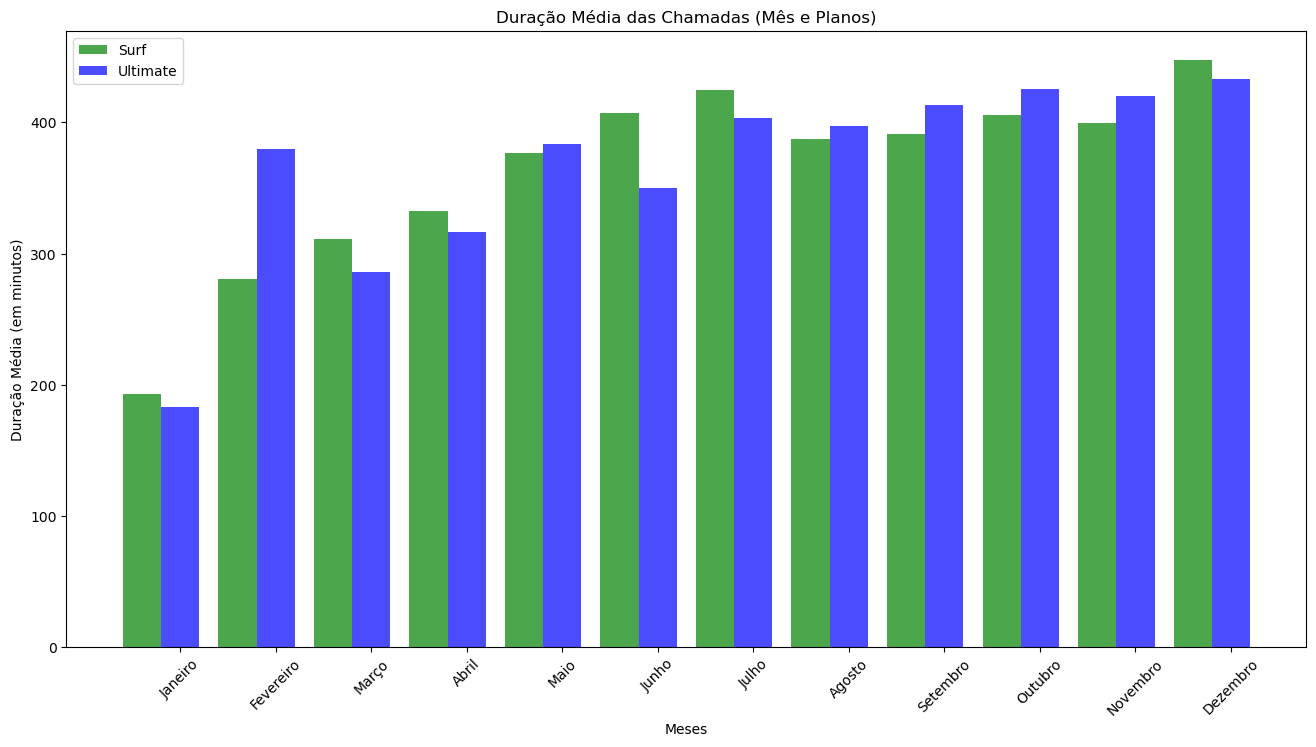

In [29]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.

media_chamadas_plano_mes = df_completo.groupby(['plan_name', 'mes'])['minutos'].mean().reset_index()

meses_lista = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro', }

media_chamadas_plano_mes['mes'] = media_chamadas_plano_mes['mes'].map(meses_lista)
sort_mes_plano = media_chamadas_plano_mes['mes'].map({mes: num for num, mes in meses_lista.items()})
sort_mes_plano = media_chamadas_plano_mes.loc[sort_mes_plano.sort_values().index]
sort_mes_plano = media_chamadas_plano_mes.reset_index(drop=True)
    
plano_surf = sort_mes_plano[sort_mes_plano['plan_name'] == 'surf']
plano_ultimate = sort_mes_plano[sort_mes_plano['plan_name'] == 'ultimate']

bar_width = 0.4
indice = np.arange(len(plano_surf['mes']))

plt.figure(figsize=(16, 8))

plt.bar(indice, plano_surf['minutos'], width=bar_width, label='Surf', alpha=0.7, color='green')
plt.bar(indice + bar_width, plano_ultimate['minutos'], width=bar_width, label='Ultimate', alpha=0.7, color='blue')

plt.xlabel('Meses')
plt.ylabel('Duração Média (em minutos)')
plt.title('Duração Média das Chamadas (Mês e Planos)')
plt.xticks(indice + bar_width, plano_surf['mes'], rotation = 45)
plt.legend()

plt.show()


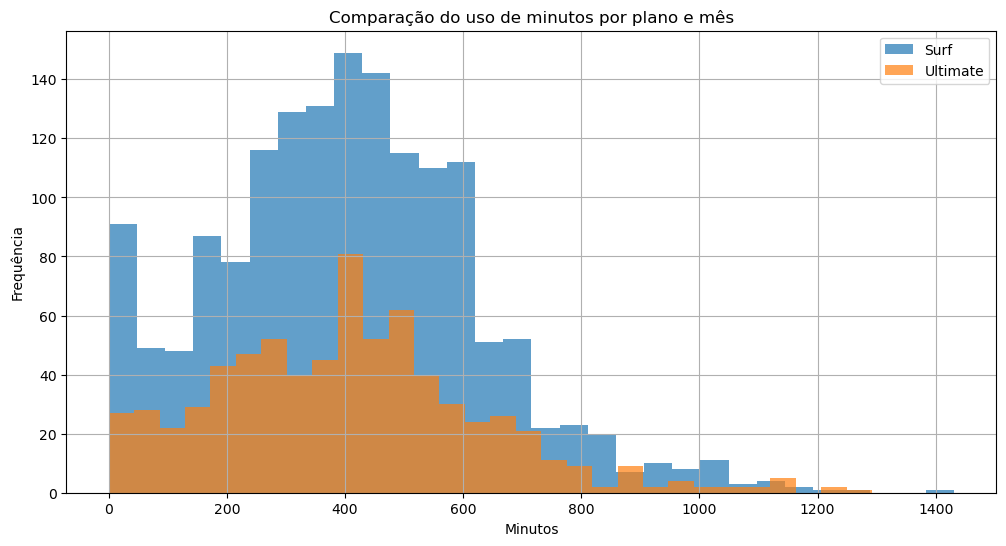

In [30]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
minutos_plano_mes = df_completo.groupby('plan_name')['minutos'].hist(alpha=0.7, bins=30, figsize=(12, 6))

plt.xlabel('Minutos')
plt.ylabel('Frequência')
plt.title('Comparação do uso de minutos por plano e mês')
plt.legend(['Surf', 'Ultimate'])

plt.show()

### Cáuculo de Médias e Desvio Padrão

In [31]:
# Média e a variância da duração mensal das chamadas

media_chamadas_mes = df_completo.groupby('mes')['minutos'].mean().reset_index()
variancia_chamadas_mes = df_completo.groupby('mes')['minutos'].var().reset_index()
desvio_padrao_chamadas_mes = np.sqrt(variancia_chamadas_mes['minutos'])

duracao_chamadas_mes = media_chamadas_mes.merge(variancia_chamadas_mes, on='mes')

duracao_chamadas_mes['desvio_padrao'] = desvio_padrao_chamadas_mes

print('Duração média e variância das chamadas por mês:')
print(duracao_chamadas_mes)

Duração média e variância das chamadas por mês:
    mes   minutos_x     minutos_y  desvio_padrao
0     1  186.388333  11978.884417     109.448090
1     2  324.168125  55034.331430     234.593971
2     3  302.306571  38297.559553     195.697623
3     4  327.685493  40857.825162     202.133187
4     5  378.862075  49052.952900     221.479012
5     6  388.474861  40290.973822     200.726116
6     7  417.719889  57598.688315     239.997267
7     8  390.248884  48145.862318     219.421654
8     9  397.839893  44405.688995     210.726574
9    10  411.711079  47179.463884     217.208342
10   11  406.066829  48599.640860     220.453262
11   12  442.818849  56522.142408     237.743859


### Distribuição de duração de chamadas

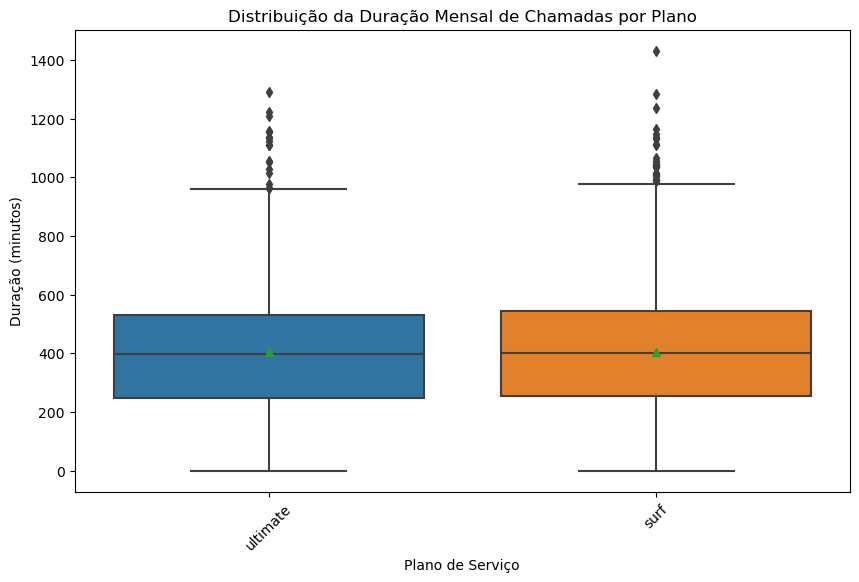

In [40]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
distrib_duracao_mensal_planos = df_completo[df_completo['plan_name'].isin(['surf', 'ultimate'])]

plt.figure(figsize=(10, 6))

sns.boxplot(
    x = "plan_name",
    y = "minutos",
    showmeans=True,
    data=distrib_duracao_mensal_planos
)

# Personalize o gráfico (opcional)
plt.xlabel("Plano de Serviço")
plt.ylabel("Duração (minutos)")
plt.title("Distribuição da Duração Mensal de Chamadas por Plano")
plt.xticks(rotation=45)

# Exiba o gráfico
plt.show()


<div class="alert alert-block alert-info">
<b>Observações:</b> <a class="tocSkip"></a>

Os gráficos acima apontam um certo equilibrio nas médias de ambos os planos. O Gráfico de barras demonstra bem este equilíbio um pico do plano 'Ultimate' em fevereiro. O histograma aponta um volume maior do plano "Surf" mas a média de uso de minutos de ambos os planos fica em torno de 400 minutos. O diagrama de caixa aponta o mesmo equilíbrio nas médias embora demonstre uma dispersão maior no plano "Surf". A quantidade de minutos usados mais do que dobrou, em. média, em dezembro quando comparado a Janeiro, a variância foi quase 4,5 vezes maior e o desvio padrão mais do que dobrou

</div>

### Comportamento do usuário: Mensagens por Mês

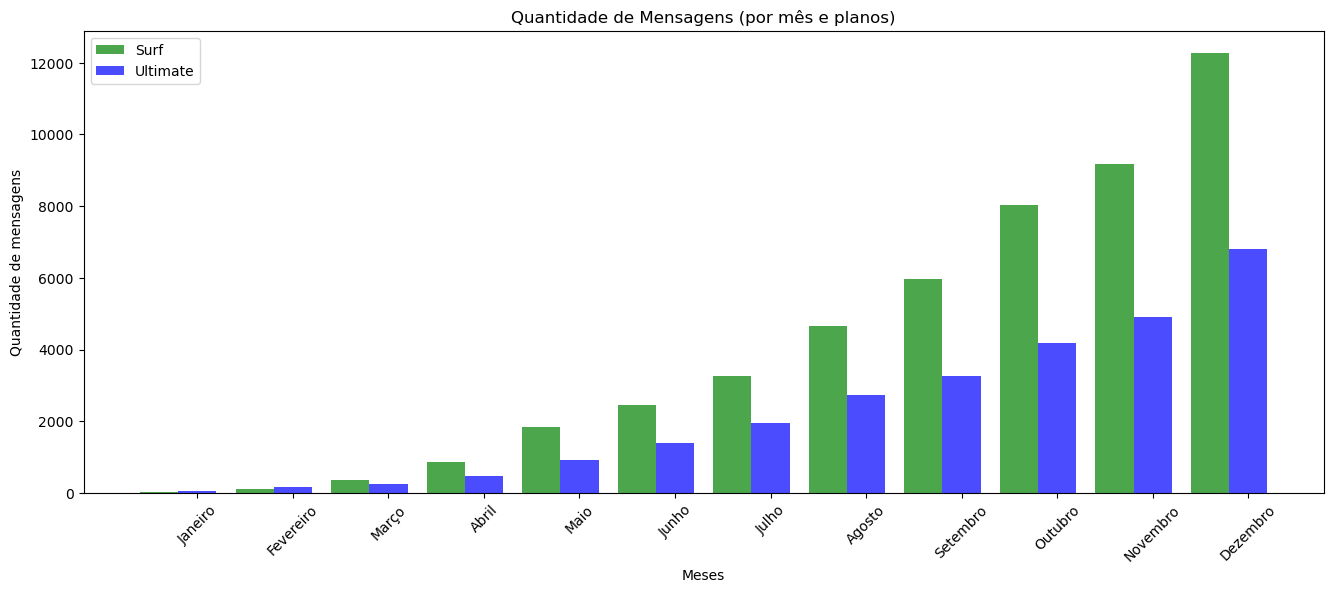

In [33]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

soma_mensagens_plano_mes = df_completo.groupby(['plan_name', 'mes'])['mensagens'].sum().reset_index()

meses_lista = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro', }

soma_mensagens_plano_mes['mes'] = soma_mensagens_plano_mes['mes'].map(meses_lista)
sort_mes_plano = soma_mensagens_plano_mes['mes'].map({mes: num for num, mes in meses_lista.items()})
sort_mes_plano = soma_mensagens_plano_mes.loc[sort_mes_plano.sort_values().index]
sort_mes_plano = soma_mensagens_plano_mes.reset_index(drop=True)

plano_surf_msg = sort_mes_plano[sort_mes_plano['plan_name'] == 'surf']
plano_ultimate_msg = sort_mes_plano[sort_mes_plano['plan_name'] == 'ultimate']

bar_width = 0.4
indice = np.arange(len(plano_surf_msg['mes']))

plt.figure(figsize=(16, 6))

plt.bar(indice, plano_surf_msg['mensagens'], width=bar_width, label='Surf', alpha=0.7, color='green')
plt.bar(indice + bar_width, plano_ultimate_msg['mensagens'], width=bar_width, label='Ultimate', alpha=0.7, color='blue')

plt.xlabel('Meses')
plt.ylabel('Quantidade de mensagens')
plt.title('Quantidade de Mensagens (por mês e planos)')
plt.xticks(indice + bar_width, plano_surf_msg['mes'], rotation = 45)
plt.legend()

plt.show()

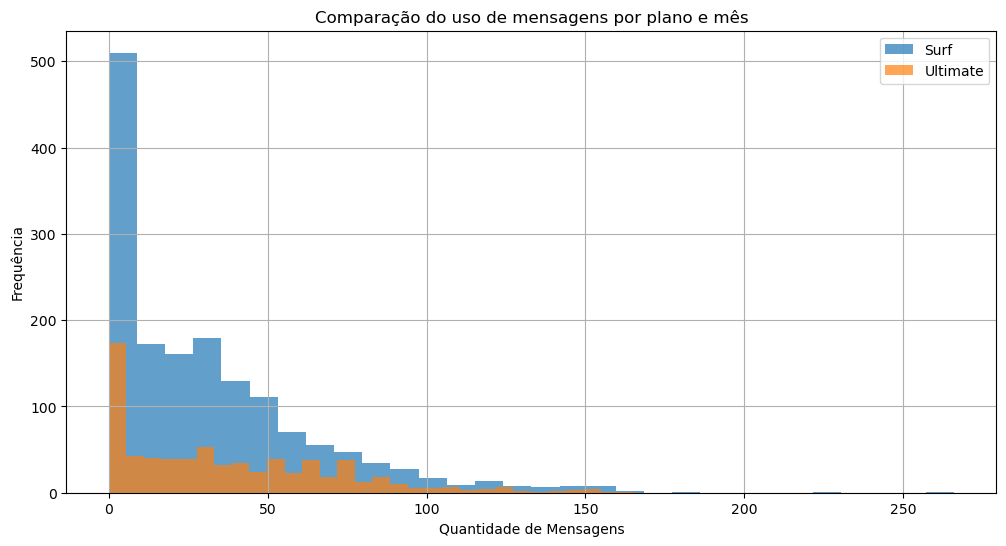

In [34]:
# Histograma
mensagens_plano_mes = df_completo.groupby('plan_name')['mensagens'].hist(alpha=0.7, bins=30, figsize=(12, 6))

plt.xlabel('Quantidade de Mensagens')
plt.ylabel('Frequência')
plt.title('Comparação do uso de mensagens por plano e mês')
plt.legend(['Surf', 'Ultimate'])

plt.show()

<div class="alert alert-block alert-info">
<b>Observações:</b> <a class="tocSkip"></a>

O comportamento dos usuários de cada plano é visivelmente diferente. Apesar de haver um aumento gradativo a cada mês em ambos os planos é possível notar uma diferença significativamente maior no volume de mensagens usadas pelos usuários do plano "Surf" em relação aos do plano "Ultimate", ainda que as médias sejam parecidas.

</div>

### Comportamento do usuário: Uso de dados de internet

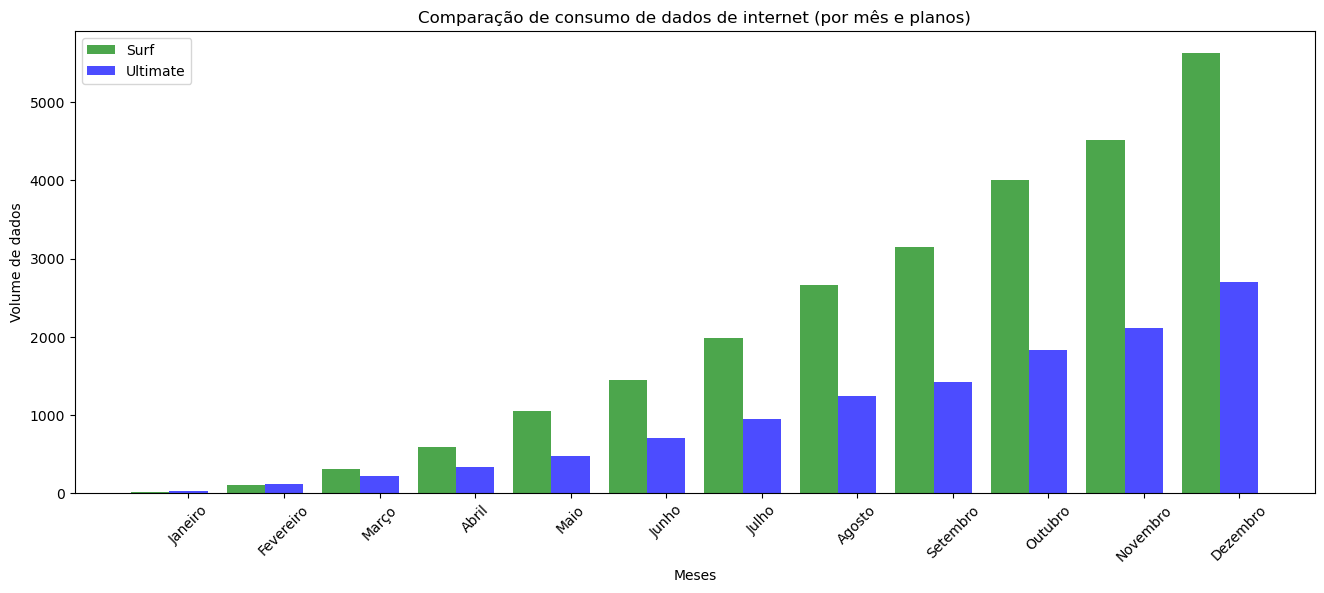

In [35]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
consumo_internet_plano_mes = df_completo.groupby(['plan_name', 'mes'])['volume_gb'].sum().reset_index()

meses_lista = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro', }

consumo_internet_plano_mes['mes'] = consumo_internet_plano_mes['mes'].map(meses_lista)
sort_mes_internet_plano = consumo_internet_plano_mes['mes'].map({mes: num for num, mes in meses_lista.items()})
sort_mes_internet_plano = consumo_internet_plano_mes.loc[sort_mes_plano.sort_values(by='mes').index]
sort_mes_internet_plano = consumo_internet_plano_mes.reset_index(drop=True)

plano_surf_internet = sort_mes_internet_plano[sort_mes_internet_plano['plan_name'] == 'surf']
plano_ultimate_internet = sort_mes_internet_plano[sort_mes_internet_plano['plan_name'] == 'ultimate']

bar_width = 0.4
indice = np.arange(len(plano_surf_internet['mes']))

plt.figure(figsize=(16, 6)) 

plt.bar(indice, plano_surf_internet['volume_gb'], width=bar_width, label='Surf', alpha=0.7, color='green')
plt.bar(indice + bar_width, plano_ultimate_internet['volume_gb'], width=bar_width, label='Ultimate', alpha=0.7, color='blue')

plt.xlabel('Meses')
plt.ylabel('Volume de dados')
plt.title('Comparação de consumo de dados de internet (por mês e planos)')
plt.xticks(indice + bar_width, plano_surf_internet['mes'], rotation = 45)
plt.legend()

plt.show()

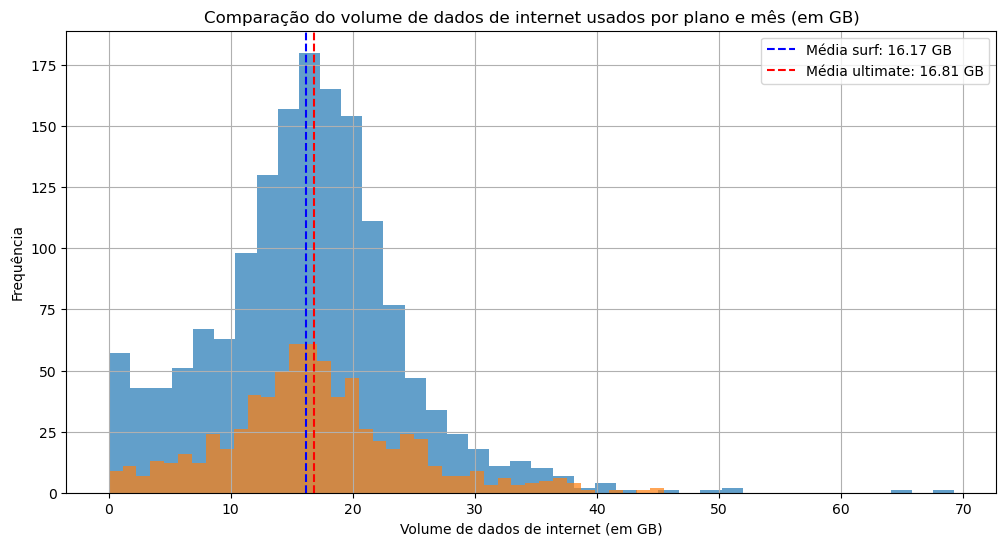

In [36]:
# Histograma
mean_volume_gb = df_completo.groupby('plan_name')['volume_gb'].mean()

# Criando o histograma
volume_mb_plano_mes = df_completo.groupby('plan_name')['volume_gb'].hist(alpha=0.7, bins=40, figsize=(12, 6))

colors = ['b', 'r']

# Adicionando linhas de média para cada plano com cores diferentes
for i, (plan_name, mean_volume) in enumerate(mean_volume_gb.items()):
    plt.axvline(mean_volume, color=colors[i], linestyle='--', label=f'Média {plan_name}: {mean_volume:.2f} GB')

plt.xlabel('Volume de dados de internet (em GB)')
plt.ylabel('Frequência')
plt.title('Comparação do volume de dados de internet usados por plano e mês (em GB)')
plt.legend(['Surf', 'Ultimate'])
plt.legend()

plt.show()

<div class="alert alert-block alert-info">
<b>Observações:</b> <a class="tocSkip"></a>

O comportamento dos usuários de cada plano em relação ao consumo de dados de internet também é visivelmente diferente. Aqui também há um aumento gradativo a cada mês em ambos os planos e também o consumo é significativamente maior pelos usuários do plano "Surf", as médias permanecem semelhantes.

</div>

## Receita

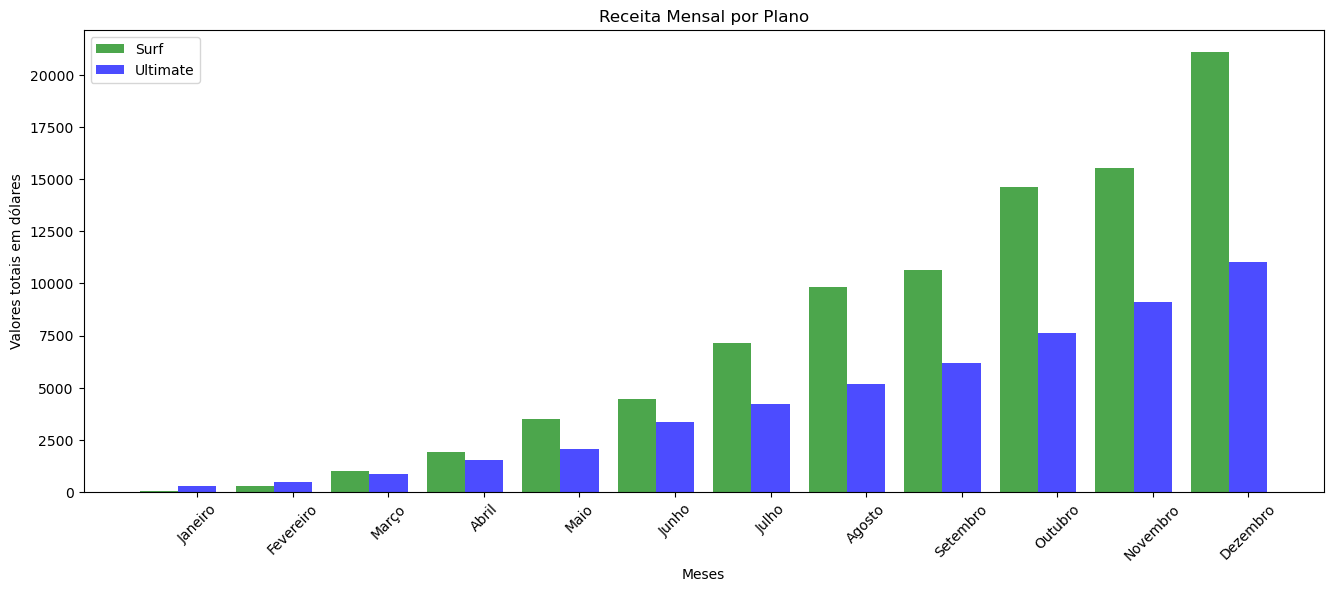

In [37]:
# Compare a receita mensal por usuários por plano
receita_plano_mes = df_completo.groupby(['plan_name', 'mes'])['receita_mensal'].sum().reset_index()

meses_lista = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro', }

receita_plano_mes['mes'] = receita_plano_mes['mes'].map(meses_lista)
sort_receita_plano = receita_plano_mes['mes'].map({mes: num for num, mes in meses_lista.items()})
sort_receita_plano = receita_plano_mes.loc[sort_mes_plano.sort_values(by='mes').index]
sort_receita_plano = receita_plano_mes.reset_index(drop=True)

plano_surf_receita = sort_receita_plano[sort_receita_plano['plan_name'] == 'surf']
plano_ultimate_receita = sort_receita_plano[sort_receita_plano['plan_name'] == 'ultimate']

bar_width = 0.4
indice = np.arange(len(plano_surf_receita['mes']))

plt.figure(figsize=(16, 6)) 

plt.bar(indice, plano_surf_receita['receita_mensal'], width=bar_width, label='Surf', alpha=0.7, color='green')
plt.bar(indice + bar_width, plano_ultimate_receita['receita_mensal'], width=bar_width, label='Ultimate', alpha=0.7, color='blue')

plt.xlabel('Meses')
plt.ylabel('Valores totais em dólares')
plt.title('Receita Mensal por Plano')
plt.xticks(indice + bar_width, plano_surf_receita['mes'], rotation = 45)
plt.legend()

plt.show()

<div class="alert alert-block alert-info">
<b>Observações:</b> <a class="tocSkip"></a>

As receitas de ambos os planos tem um aumento gradativo durante o ano. Podemos notar também que as receitas geradas pelo plano "Ultimate" são significativamente maiores a partir do 2º trimestre.

</div>

### TESTE ESTATÍSTICO DE HIPOTESES:

<div class="alert alert-block alert-info">
<b>TESTE DE HIPÓTESE 1</b> <a class="tocSkip"></a>

* A Hipótese Nula (H0) afirma que: As receitas médias dos usuários dos planos de chamadas 'Ultimate' e 'Surf' são IGUAIS.
* A Hipótese Alternativa (H1) afirma que: As receitas médias dos usuários dos planos de chamadas 'Ultimate' e 'Surf' são DIFERENTES.

</div>


Receita Total Plano Ultimate: 51923.9
Receita Total para o Plano Surf: 90131.42

Média paga por Plano Ultimate: 72.12
Média paga por Plano Surf: 57.3

Variância Plano Ultimate: 116.1
Variância Plano Surf: 2888.29

Desvio Padrão Plano Ultimate: 10.77
Desvio Padrão Plano Surf: 53.74



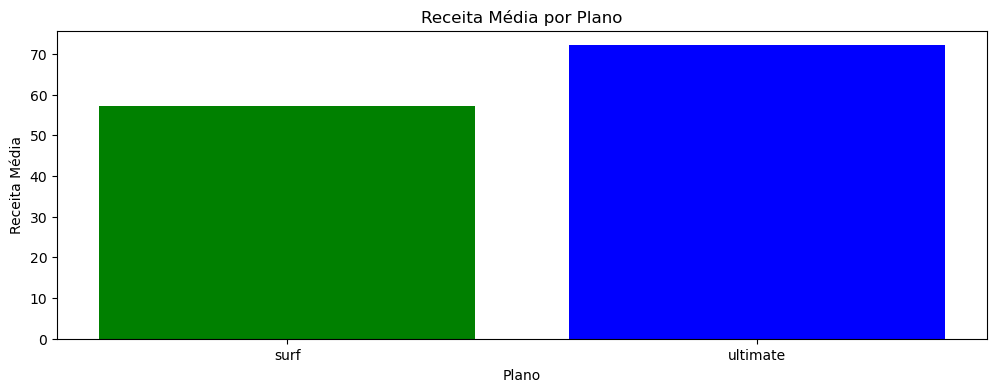

Resultado do Teste de Hipótese:

P-Valor : 5.137254241381237e-25

Rejeitamos a hipótese nula.

Há evidências suficientes para suportar a HIPÓTESE ALTERNATIVA de que as receitas médias dos usuários dos planos Ultimate e Surf são diferentes.

Hipótese Nula (H0): As receitas médias dos usuários dos planos Ultimate e Surf são IGUAIS.
Hipótese Alternativa (H1): As receitas médias dos usuários dos planos Ultimate e Surf são DIFERENTES.


In [38]:
# Dados filtrados dos planos
df_ultimate = df_completo[df_completo['plan_name'] == 'ultimate']
df_surf = df_completo[df_completo['plan_name'] == 'surf']

# Receita total para cada plano
receita_total_ultimate = df_ultimate['receita_mensal'].sum()
receita_total_surf = df_surf['receita_mensal'].sum()

# Média paga por mês para cada plano
media_pagamento_por_mes_ultimate = df_ultimate['receita_mensal'].mean()
media_pagamento_por_mes_surf = df_surf['receita_mensal'].mean()

# Variância para cada plano
variancia_ultimate = df_ultimate['receita_mensal'].var()
variancia_surf = df_surf['receita_mensal'].var()

# Desvio padrão para cada plano
desvio_padrao_ultimate = df_ultimate['receita_mensal'].std()
desvio_padrao_surf = df_surf['receita_mensal'].std()

# Arredondamento dos resultados
receita_total_ultimate = round(receita_total_ultimate, 2)
receita_total_surf = round(receita_total_surf, 2)

media_pagamento_por_mes_ultimate = round(media_pagamento_por_mes_ultimate, 2)
media_pagamento_por_mes_surf = round(media_pagamento_por_mes_surf, 2)

variancia_ultimate = round(variancia_ultimate, 2)
variancia_surf = round(variancia_surf, 2)

desvio_padrao_ultimate = round(desvio_padrao_ultimate, 2)
desvio_padrao_surf = round(desvio_padrao_surf, 2)

print()
print("Receita Total Plano Ultimate:", receita_total_ultimate)
print("Receita Total para o Plano Surf:", receita_total_surf)
print()
print("Média paga por Plano Ultimate:", media_pagamento_por_mes_ultimate)
print("Média paga por Plano Surf:", media_pagamento_por_mes_surf)
print()
print("Variância Plano Ultimate:", variancia_ultimate)
print("Variância Plano Surf:", variancia_surf)
print()
print("Desvio Padrão Plano Ultimate:", desvio_padrao_ultimate)
print("Desvio Padrão Plano Surf:", desvio_padrao_surf)
print()

# Gráfico com receita total dos planos
receita_total_por_plano = df_completo.groupby('plan_name')['receita_mensal'].mean()

cores = ['green', 'blue']
plt.figure(figsize=(12, 4)) 

plt.bar(receita_total_por_plano.index, receita_total_por_plano.values, color=cores)

plt.xlabel('Plano')
plt.ylabel('Receita Média')
plt.title('Receita Média por Plano')
plt.show()

# Teste de Hipótese (Teste t)
# Filtro de dados para cada plano
dados_ultimate = df_completo[df_completo['plan_name'] == 'ultimate']['receita_mensal']
dados_surf = df_completo[df_completo['plan_name'] == 'surf']['receita_mensal']

# Teste t de Student para comparar as médias
t_statistic, p_value = st.ttest_ind(dados_ultimate, dados_surf, equal_var=False)
alpha = 0.05

# Imprimir os resultados do teste de hipótese
print("Resultado do Teste de Hipótese:")
print()
print("P-Valor :", p_value)
print()

# Verificar se o valor p é menor que alfa para rejeitar a hipótese nula
if p_value < alpha:
    print("Rejeitamos a hipótese nula.")
    print()
    print("Há evidências suficientes para suportar a HIPÓTESE ALTERNATIVA de que as receitas médias dos usuários dos planos Ultimate e Surf são diferentes.")
    print()
    print("Hipótese Nula (H0): As receitas médias dos usuários dos planos Ultimate e Surf são IGUAIS.")
    print("Hipótese Alternativa (H1): As receitas médias dos usuários dos planos Ultimate e Surf são DIFERENTES.")
else:
    print("Não rejeitamos a hipótese nula.")
    print()
    print("Não há evidências suficientes para afirmar que as receitas médias dos usuários dos planos Ultimate e Surf são diferentes.")
    print()
    print("Hipótese Nula (H0): As receitas médias dos usuários dos planos Ultimate e Surf são IGUAIS.")
    print("Hipótese Alternativa (H1): As receitas médias dos usuários dos planos Ultimate e Surf são DIFERENTES.")
    

<div class="alert alert-block alert-info">
<b>OBSERVAÇÕES DO TESTE DE HIPÓTESE 1</b> <a class="tocSkip"></a>

* A Hipótese Nula (H0) afirma que: As receitas médias dos usuários dos planos de chamadas 'Ultimate' e 'Surf' são IGUAIS.
* A Hipótese Alternativa (H1) afirma que: As receitas médias dos usuários dos planos de chamadas 'Ultimate' e 'Surf' são DIFERENTES.

No código abaixo realizamos um Test T de Student para verificar a igualdade nas receitas médias dos planos em amostras independentes, definimos a significância alfa em 0,05 e a comparamos com o valor-p. Caso o valor-p seja menor que a significância de 5%, a hipótese nula será rejeitada, caso contrário o teste apontará que não há evidências para rejeitá-la e acataremos a hipótese alternativa.

É importante ressaltar que, embora não tenhamos encontrado evidências suficientes para afirmar que as receitas médias são diferentes, isso não significa necessariamente que os planos são iguais em termos de rentabilidade ou popularidade. Outros fatores podem estar influenciando as diferenças observadas nos resultados da receita total e da média paga por mês, como o número de assinantes em cada plano, as características dos serviços oferecidos, entre outros.

</div>

<div class="alert alert-success">
<b>TESTE DE HIPÓTESE 2</b> <a class="tocSkip"></a>

* A Hipótese Nula (H0) afirma que: A receita média dos usuários da área de NY-NJ é IGUAL à receita média das demais regiões.
* A Hipótese Alternativa (H1) afirma que: A receita média dos usuários da área de NY-NJ DIFERE da receita média das demais regiões.

</div>


Receita Total NY-NY: 21563.79
Receita Total Demais Regiões: 120491.52

Média paga NY-NY: 57.2
Média paga Demais Regiões: 62.89

Variância NY-NY: 1778.42
Variância Demais Regiões: 2116.67

Desvio Padrão NY-NY: 42.17
Desvio Padrão Demais Regiões: 46.01



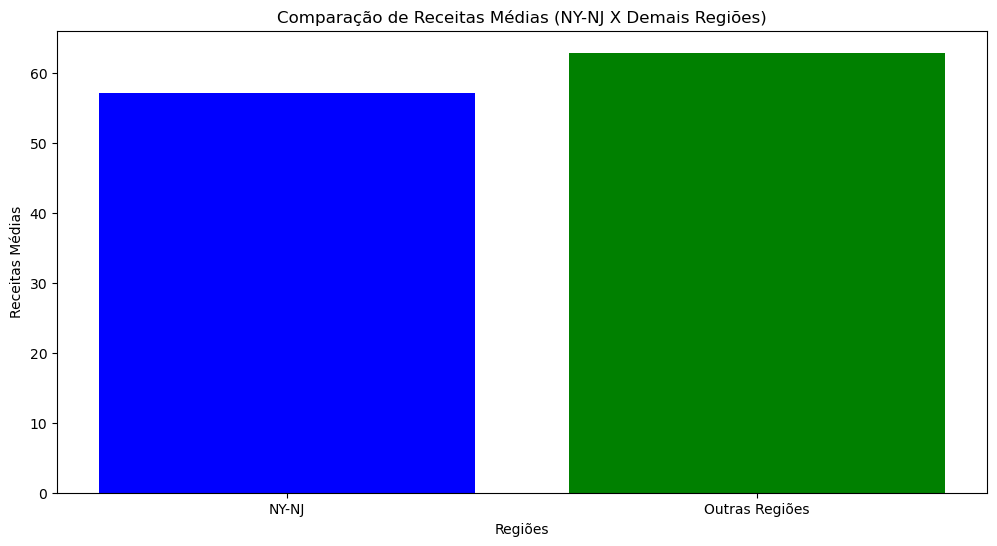

Resultado do Teste de Hipótese:

P-Valor:  0.018732557427851213

Rejeitamos a hipótese nula.

Há evidências suficientes para suportar a HIPÓTESE ALTERNATIVA de que as receitas médias dos usuários da área de NY-NJ diferem da receita média das demais regiões.

Hipótese Nula (H0): A receita média dos usuários da área de NY-NJ é IGUAL à receita média das demais regiões.
Hipótese Alternativa (H1): A receita média dos usuários da área de NY-NJ é DIFERENTE da receita média das demais regiões.


In [39]:
# Filtro dos dados para usuários da área de NY-NJ e demais regiões
ny_nj_receita = df_completo[df_completo['city'] == 'new york-newark-jersey city']
outras_regioes_receita = df_completo[df_completo['city'] != 'new york-newark-jersey city']

# Receita total para cada plano
receita_total_nynj = ny_nj_receita['receita_mensal'].sum()
receita_total_demais = outras_regioes_receita['receita_mensal'].sum()

# Média paga por mês para cada plano
media_pagamento_nynj = ny_nj_receita['receita_mensal'].mean()
media_pagamento_demais = outras_regioes_receita['receita_mensal'].mean()

# Variância para cada plano
variancia_nynj = ny_nj_receita['receita_mensal'].var()
variancia_demais = outras_regioes_receita['receita_mensal'].var()

# Desvio padrão para cada plano
desvio_padrao_nynj = ny_nj_receita['receita_mensal'].std()
desvio_padrao_demais = outras_regioes_receita['receita_mensal'].std()

# Arredondamento dos resultados
receita_total_nynj = round(receita_total_nynj, 2)
receita_total_demais = round(receita_total_demais, 2)

media_pagamento_nynj = round(media_pagamento_nynj, 2)
media_pagamento_demais = round(media_pagamento_demais, 2)

variancia_nynj = round(variancia_nynj, 2)
variancia_demais = round(variancia_demais, 2)

desvio_padrao_nynj = round(desvio_padrao_nynj, 2)
desvio_padrao_demais = round(desvio_padrao_demais, 2)

print()
print("Receita Total NY-NY:", receita_total_nynj)
print("Receita Total Demais Regiões:", receita_total_demais)
print()
print("Média paga NY-NY:", media_pagamento_nynj)
print("Média paga Demais Regiões:", media_pagamento_demais)
print()
print("Variância NY-NY:", variancia_nynj)
print("Variância Demais Regiões:", variancia_demais)
print()
print("Desvio Padrão NY-NY:", desvio_padrao_nynj)
print("Desvio Padrão Demais Regiões:", desvio_padrao_demais)
print()

# Teste de Hipótese (Teste t)
# Filtro de dados para cada plano
dados_nynj = df_completo[df_completo['city'] == 'new york-newark-jersey city']['receita_mensal']
dados_demais = df_completo[df_completo['city'] != 'new york-newark-jersey city']['receita_mensal']

# Teste t de Student para comparar as médias
t_statistic, p_value = st.ttest_ind(dados_nynj, dados_demais, equal_var=False)
alpha = 0.05

# Preparando os dados para o gráfico
regioes = ['NY-NJ', 'Outras Regiões']
medias = [media_pagamento_nynj.mean(), media_pagamento_demais.mean()]

# Gráfico de barras
plt.figure(figsize=(12, 6)) 

plt.bar(regioes, medias, color=['blue', 'green'])
plt.xlabel('Regiões')
plt.ylabel('Receitas Médias')
plt.title('Comparação de Receitas Médias (NY-NJ X Demais Regiões)')
plt.show()

# Imprimir os resultados do teste de hipótese
print("Resultado do Teste de Hipótese:")
print()
print("P-Valor: ", p_value)
print()

# Verificando se a hipótese nula é rejeitada
if p_value < alpha:
    print("Rejeitamos a hipótese nula.")
    print()
    print("Há evidências suficientes para suportar a HIPÓTESE ALTERNATIVA de que as receitas médias dos usuários da área de NY-NJ diferem da receita média das demais regiões.")
    print()
    print("Hipótese Nula (H0): A receita média dos usuários da área de NY-NJ é IGUAL à receita média das demais regiões.")
    print("Hipótese Alternativa (H1): A receita média dos usuários da área de NY-NJ é DIFERENTE da receita média das demais regiões.")
else:
    print("Não rejeitamos a hipótese nula.")
    print()
    print("Não há evidências suficientes para afirmar que a receita média dos usuários da área de NY-NJ DIFERE da receita média das demais regiões.")
    print()
    print("Hipótese Nula (H0): A receita média dos usuários da área de NY-NJ é IGUAL à receita média das demais regiões.")
    print("Hipótese Alternativa (H1): A receita média dos usuários da área de NY-NJ é DIFERENTE da receita média das demais regiões.")
    

<div class="alert alert-success">
<b>OBSERVAÇÕES DO TESTE DE HIPÓTESE 2</b> <a class="tocSkip"></a>

* A Hipótese Nula (H0) afirma que: A receita média dos usuários da área de NY-NJ é IGUAL à receita média das demais regiões.
* A Hipótese Alternativa (H1) afirma que: A receita média dos usuários da área de NY-NJ DIFERE da receita média das demais regiões.

No código abaixo realizamos um Test T de Student para verificar a igualdade nas receitas médias dos planos em amostras independentes e para isso filtramos os dados da coluna 'state' em: iguais a 'ny-nj' e diferentes a 'ny-nj', definimos a significância alfa em 0,05 e a comparamos com o valor-p. Caso o valor-p seja menor que a significância de 5%, a hipótese nula será rejeitada, caso contrário o teste apontará que não há evidências para rejeitá-la e acataremos a hipótese alternativa.

</div>

## CONCLUSÃO:

<div class="alert alert-block alert-info">
<b>COMPORTAMENTO DOS USUÁRIOS</b>

<b>CHAMADAS:</b>
Ambos os planos têm uma média de uso de minutos em torno de 400 minutos, indicando um equilíbrio nesse aspecto.
O plano Surf tem um volume maior de minutos utilizados, mas as médias permanecem semelhantes entre os dois planos.

<b>MENSAGENS:</b>
Os usuários do plano Surf usam significativamente mais mensagens do que os usuários do plano Ultimate, apesar das médias serem semelhantes.

<b>INTERNET:</b>
Assim como nas chamadas, o uso de dados de internet é significativamente maior pelos usuários do plano Surf, apesar das médias serem semelhantes.

<b>RECEITA:</b>
As receitas de ambos os planos aumentam gradualmente ao longo do ano, sendo que a receita do plano 'Ultimate' é consistentemente maior que a do plano 'Surf', chegando a dobrar a partir do 2º semestre.

<b>TESTES DE HIPÓTESES:</b>

- Teste de Hipótese 1: Realizamos o Teste T Student com amostras independentes neste caso e o resultado do teste REJEITOU a hipótese nula, indicando que as receitas médias dos usuários dos planos Ultimate e Surf são DIFERENTES, confirmando a observação de que a receita do plano 'Ultimate' é majoritariamente maior que a do plano 'Surf'.

- Teste de Hipótese 2: Realizamos o Teste T Student com amostras independentes neste caso e o resultado do teste também REJEITOU a hipótese nula, indicando que a receita média dos usuários da área de NY-NJ É DIFERENTE da receita média das demais regiões.

<b>INSIGHTS:</b>
    
Analisando os três serviços oferecidos pela empresa dentro de dois planos distintos, chegamos à conclusão de que os usuários do plano 'Surf' demandam muito mais da empresa, no entanto, geram menos receita do que os usuários do plano 'Ultimate'.

Com estes dados, a equipe de marketing pode ajustar seus orçamentos para favorecer o plano 'Ultimate', que gera mais receita e demanda menos serviço. A empresa pode se valer também dos dados e criar, por exemplo, novos planos intermediários e/ou ainda ajustar os planos atuais.

Essas conclusões são fundamentais para entender as tendências de comportamento dos usuários de cada plano e podem orientar novas estratégias na adequação nos produtos e serviços em curso e no desenvolvimento de novos produtos para a empresa.
</div>
